<div style="overflow:auto;">
    <div style="float:left; margin-right:10px;">
        <img width='120' height='120' src='https://cityme.novaims.unl.pt/images/footer/novaims.png'>
    </div>

# <p align="center">Siemens Sales Forecast</p>

---

## <p align="center">*External data transformation*</p>

---

### 👥 **Team Members**
- **Ana Farinha** *(Student Number: 20211514)*  
- **António Oliveira** *(Student Number: 20211595)*  
- **Mariana Neto** *(Student Number: 20211527)*  
- **Salvador Domingues** *(Student Number: 20240597)*  

📅 **Date:** *April 1, 2025*  
📍 **Prepared for:** *Siemens*  

**GitHub Repo:** https://github.com/MGN19/Siemens-forecast

---

# ToC

<a class="anchor" id="top"></a>


1. [Stocks Data](#1.-Stocks-Data) <br><br>

2. [Consumer Confidence Data](#2.-Consumer-Confidence-Data) <br><br>

3. [Business Confidence Data](#3.-Business-Confidence-Data) <br><br>

4. [Covid-19 Strintegy Index](#4.-Covid-19-Strintegy-Index) <br><br>

5. [Energy Data](#5.-Energy-Data) <br><br>

6. [Building Construction in Germany](#6.-Building-Construction-in-Germany) <br>

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)
import functions as f

# 1. Stocks Data

This dataset contains historical stock price data for Siemens, providing insights into market trends and potential correlations with sales performance across different product groups.

The data can be found at:

Investing.com. (n.d.). Siemens historical data. Retrieved March 17, 2025, from https://www.investing.com/equities/siemens-historical-data

In [2]:
stock = pd.read_csv('./extra data/Siemens AG Stock Price History.csv')
stock.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,04/01/2022,117.78,126.36,127.00,111.50,33.67M,-6.27%
1,03/01/2022,125.66,125.00,138.08,105.92,60.02M,-0.79%
2,02/01/2022,126.66,141.18,149.26,120.84,46.90M,-9.45%
3,01/01/2022,139.88,151.82,157.96,136.18,31.83M,-8.38%
4,12/01/2021,152.68,142.70,154.70,141.18,24.91M,8.07%


Choosing only relevant columns.

In [3]:
stock2 = stock[['Date', 'Price', 'Vol.', 'Change %']]

In [4]:
stock2['Date'] = pd.to_datetime(stock2['Date'])
stock2 = stock2.set_index('Date')

/var/folders/pw/sbpycr1d17b1j4255gwjl17c0000gn/T/ipykernel_60101/4244389695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock2['Date'] = pd.to_datetime(stock2['Date'])


**Exploring the dataset structure with .info() method**

In [5]:
stock2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2022-04-01 to 2018-10-01
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     43 non-null     float64
 1   Vol.      43 non-null     object 
 2   Change %  43 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


There are no missing values. As `Vol.` and `Change %` are stored as object, we will transform them to float.

In [6]:
def convert_volume(vol_str):
    if isinstance(vol_str, str):
        vol_str = vol_str.replace('M', 'e6').replace('K', 'e3').replace(',', '')
        return float(eval(vol_str))
    return vol_str

As in the `Vol.` column we have abbreviations like M, we will convert stock volume values from string format into numerical format.

In [7]:
stock2['Volume'] = stock2['Vol.'].apply(convert_volume)

Coverting stock changing to float.

In [8]:
stock2['Change %'] = stock2['Change %'].str.replace('%', '')
stock2['Change %'] = pd.to_numeric(stock2['Change %'], errors='coerce')  # convert to float

In [9]:
stock2.drop('Vol.', axis = 1, inplace = True)

In [10]:
stock2.head()

,Price,Change %,Volume
Date,,,
2022-04-01,117.78,-6.27,33670000.0
2022-03-01,125.66,-0.79,60020000.0
2022-02-01,126.66,-9.45,46900000.0
2022-01-01,139.88,-8.38,31830000.0
2021-12-01,152.68,8.07,24910000.0


In [11]:
fig = px.line(stock2, x=stock2.index, y="Price", markers=True, 
              title="Siemens Stock Price Over Time", 
              labels={"Price": "Stock Price (€)", "index": "Date"})

fig.update_layout(xaxis=dict(title="Date", tickangle=45), 
                  yaxis=dict(title="Stock Price (€)"),
                  template="plotly_white")

fig.show()

In [12]:
stock2_sorted = stock2[::-1]
fig = px.bar(stock2_sorted, x=stock2_sorted.index, y="Volume", 
             title="Monthly Trading Volume", labels={"index": "Date", "Volume": "Trading Volume"},
             color_discrete_sequence=["#009C8C"])
fig.update_layout(xaxis=dict(tickangle=-45))
fig.show()

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=stock2.index, y=stock2["Change %"], 
                         mode='lines+markers', 
                         marker=dict(color='red'),
                         name='Change %'))
fig.add_hline(y=0, line=dict(dash='dash', color='black', width=1))
fig.update_layout(
    title="Percentage Change Over Time",
    xaxis_title="Date",
    yaxis_title="Change %",
    xaxis=dict(tickangle=45),
    template="plotly_white",
    showlegend=True
)
fig.show()

Between November 2019 and March 2020, Siemens' stock price experienced its most significant decline within this timeframe. This may have been driven by the COVID-19 pandemic, which increased market instability and lowered demand. Additionally, two other possible factors could be the trade tensions between China and the United States and the oil price crash in early March 2020, caused by a dispute between Russia and Saudi Arabia. Interestingly, Siemens recorded the highest total number of shares traded in March 2020.

From March 2020 to March 2021, Siemens' stock prices generally increased, despite some fluctuations, including a decline in October 2020.This increase can be attributed to the adjustment of global economies and the introduction of government stimulus measures to support businesses.

After, December 2021 the stocks price decreased.

In [14]:
#stock2.to_csv('./extra data/clean_stock_data.csv')

# 2. Consumer Confidence Data

The Consumer Confidence Index (CCI) provides insights into expected household consumption and saving trends. It reflects consumer sentiment on financial conditions, the economy, unemployment, and savings ability. A CCI above 100 signals confidence, leading to increased spending on major purchases, while a score below 100 suggests pessimism, prompting more saving and reduced consumption. Tracking CCI can help Siemens anticipate shifts in consumer behavior across regions.

The data can be found at:

OECD. (n.d.). Composite leading indicators (CLI) - Monthly data. OECD. Retrieved March 17, 2025, from https://data-explorer.oecd.org/vis?lc=en&pg=0&snb=1&vw=tb&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_STES%40DF_CLI&df[ag]=OECD.SDD.STES&df[vs]=&pd=2018-11%2C2022-04&dq=CHN%2BOECDE%2BCHE%2BFRA%2BUSA%2BGBR%2BJPN%2BITA%2BDEU.M.CCICP...AA...H&ly[rw]=TIME_PERIOD&ly[cl]=REF_AREA&to[TIME_PERIOD]=false

In [15]:
consumer_confidence = pd.read_csv('./extra data/composite_consumer_confidence.csv')
consumer_confidence.head(3)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,UNIT_MEASURE,Unit of measure,ACTIVITY,Economic activity,ADJUSTMENT,Adjustment,TRANSFORMATION,Transformation,TIME_HORIZ,Time horizon,METHODOLOGY,Calculation methodology,TIME_PERIOD,Time period,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals,BASE_PER,Base period
0,DATAFLOW,OECD.SDD.STES:DSD_STES@DF_CLI(4.1),Composite leading indicators,I,USA,United States,M,Monthly,CCICP,Composite consumer confidence,IX,Index,_Z,Not applicable,AA,Amplitude adjusted,IX,Index,_Z,Not applicable,H,OECD harmonised,2020-01,NaN,101.6108,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
1,DATAFLOW,OECD.SDD.STES:DSD_STES@DF_CLI(4.1),Composite leading indicators,I,USA,United States,M,Monthly,CCICP,Composite consumer confidence,IX,Index,_Z,Not applicable,AA,Amplitude adjusted,IX,Index,_Z,Not applicable,H,OECD harmonised,2020-02,NaN,101.1944,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
2,DATAFLOW,OECD.SDD.STES:DSD_STES@DF_CLI(4.1),Composite leading indicators,I,OECDE,OECD Europe,M,Monthly,CCICP,Composite consumer confidence,IX,Index,_Z,Not applicable,AA,Amplitude adjusted,IX,Index,_Z,Not applicable,H,OECD harmonised,2018-12,NaN,100.5454,NaN,A,Normal value,0,Units,2,Two,NaN,NaN


In [16]:
consumer_confidence.drop(['STRUCTURE','STRUCTURE_ID', 'STRUCTURE_NAME', 
                          'ACTION', 'FREQ', 'Frequency of observation',
                          'MEASURE', 'Measure', 'UNIT_MEASURE',
                          'Unit of measure', 'ACTIVITY', 'Economic activity',
                          'ADJUSTMENT', 'Adjustment', 'TRANSFORMATION',
                          'Transformation', 'TIME_HORIZ', 'Time horizon',
                          'METHODOLOGY', 'Calculation methodology', 'Time period',
                          'Observation value', 'OBS_STATUS', 'UNIT_MULT', 'Observation status',
                          'Unit multiplier', 'DECIMALS', 'BASE_PER', 'Base period', 'Decimals',
                          'REF_AREA'],
                         axis = 1, inplace = True)

In [17]:
consumer_confidence['TIME_PERIOD'] =  pd.to_datetime(consumer_confidence['TIME_PERIOD'])
consumer_confidence = consumer_confidence.set_index('TIME_PERIOD')

The pivot table will be created to transform the countries into columns for easier comparison.

In [18]:
cc2 = consumer_confidence.pivot_table(index=consumer_confidence.index, columns='Reference area', values='OBS_VALUE')
cc2.head()

Reference area,China (People’s Republic of),France,Germany,Italy,Japan,OECD Europe,Switzerland,United Kingdom,United States
TIME_PERIOD,,,,,,,,,
2018-10-01,102.8056,98.94864,101.5778,101.7588,100.38490,100.7815,100.31800,100.69820,101.5022
2018-11-01,103.2386,98.71818,101.5438,101.6450,100.28500,100.6595,100.30690,100.43900,101.3958
2018-12-01,103.6305,98.62968,101.5190,101.4642,100.17410,100.5454,100.17240,100.13600,101.2298
2019-01-01,103.9405,98.97886,101.5336,101.2748,100.02720,100.5180,99.97832,99.85248,101.0311
2019-02-01,104.1535,99.37622,101.5480,101.0606,99.87872,100.5431,99.80544,99.72394,101.0838


**Exploring the dataset structure with .info() method**

In [19]:
cc2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2018-10-01 to 2022-04-01
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   China (People’s Republic of)  43 non-null     float64
 1   France                        43 non-null     float64
 2   Germany                       43 non-null     float64
 3   Italy                         43 non-null     float64
 4   Japan                         43 non-null     float64
 5   OECD Europe                   43 non-null     float64
 6   Switzerland                   43 non-null     float64
 7   United Kingdom                43 non-null     float64
 8   United States                 43 non-null     float64
dtypes: float64(9)
memory usage: 3.4 KB


There are no missing values in the dataset. The data is already in the correct format for plotting, therefore no further transformations are needed.

In [20]:
fig = px.line(cc2, x=cc2.index, y=cc2.columns, title="Consumer Confidence Index Across Countries",
              labels={"value": "CCI", "TIME_PERIOD": "Date"})
fig.update_layout(xaxis_title="Date", yaxis_title="CCI", 
                  legend_title="Countries")
fig.show()

Overall, China showed stronger long-term consumer confidence compared to other countries. From December 2019 to May 2020, all countries experienced a decline in their CCI, reflecting a period of economic uncertainty. This downturn coincided with a drop in Siemens' stock prices, indicating the influence of consumer sentiment on the company’s performance. After this decline, the CCI for all countries began to rise, though with some fluctuations. This recovery phase suggested improved consumer confidence, contributing to an increase in Siemens' stock prices.

However, starting in January 2022, all countries saw a notable decline in their CCIs, indicating more cautious consumer expectations. The biggest drop was in China, where the CCI fell sharply below the 100 mark, indicating a pessimistic view of the future economy and reduced consumer confidence.

Japan stands out during this period (October 2018 - April 2022), as its CCI remained below the 100 threshold for most of the time, consistently reflecting a weaker consumer sentiment compared to other countries.

In [21]:
#cc2.to_csv('./extra data/clean_consumer_confidence.csv')

# 3. Business Confidence Data

The Business Confidence Index (BCI) is an indicator that provided an indication of future developments in business, based on surveys of production, orders, and finished goods stocks. A BCI above 100 suggest an increased confidence in near future business performance, and numbers below 100 indicate pessimism towards future performance. This indicator might help forecasting Siemens' sales performance, since it monitors economic activity.

The data can be found at:

OECD. (n.d.). Business Confidence Index (BCI) data explorer. OECD Data Explorer. https://data-explorer.oecd.org/vis?lc=en&pg=0&snb=1&vw=tb&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_STES%40DF_CLI&df[ag]=OECD.SDD.STES&df[vs]=&pd=2018-11%2C2022-04&dq=CHN%2BOECDE%2BCHE%2BFRA%2BUSA%2BGBR%2BJPN%2BITA%2BDEU.M.BCICP...AA...H&ly[rw]=TIME_PERIOD&ly[cl]=REF_AREA&to[TIME_PERIOD]=false

In [22]:
business_confidence = pd.read_csv('./extra data/composite_business_confidence.csv')
business_confidence.head(3)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,UNIT_MEASURE,Unit of measure,ACTIVITY,Economic activity,ADJUSTMENT,Adjustment,TRANSFORMATION,Transformation,TIME_HORIZ,Time horizon,METHODOLOGY,Calculation methodology,TIME_PERIOD,Time period,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals,BASE_PER,Base period
0,DATAFLOW,OECD.SDD.STES:DSD_STES@DF_CLI(4.1),Composite leading indicators,I,OECDE,OECD Europe,M,Monthly,BCICP,Composite business confidence,IX,Index,_Z,Not applicable,AA,Amplitude adjusted,IX,Index,_Z,Not applicable,H,OECD harmonised,2019-12,NaN,99.91677,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
1,DATAFLOW,OECD.SDD.STES:DSD_STES@DF_CLI(4.1),Composite leading indicators,I,OECDE,OECD Europe,M,Monthly,BCICP,Composite business confidence,IX,Index,_Z,Not applicable,AA,Amplitude adjusted,IX,Index,_Z,Not applicable,H,OECD harmonised,2020-01,NaN,99.85726,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
2,DATAFLOW,OECD.SDD.STES:DSD_STES@DF_CLI(4.1),Composite leading indicators,I,ITA,Italy,M,Monthly,BCICP,Composite business confidence,IX,Index,_Z,Not applicable,AA,Amplitude adjusted,IX,Index,_Z,Not applicable,H,OECD harmonised,2018-12,NaN,100.70230,NaN,A,Normal value,0,Units,2,Two,NaN,NaN


In [23]:
business_confidence.drop(['STRUCTURE','STRUCTURE_ID', 'STRUCTURE_NAME', 
                          'ACTION', 'FREQ', 'Frequency of observation',
                          'MEASURE', 'Measure', 'UNIT_MEASURE',
                          'Unit of measure', 'ACTIVITY', 'Economic activity',
                          'ADJUSTMENT', 'Adjustment', 'TRANSFORMATION',
                          'Transformation', 'TIME_HORIZ', 'Time horizon',
                          'METHODOLOGY', 'Calculation methodology', 'Time period',
                          'Observation value', 'OBS_STATUS', 'UNIT_MULT', 'Observation status',
                          'Unit multiplier', 'DECIMALS', 'BASE_PER', 'Base period', 'Decimals',
                          'REF_AREA'],
                         axis = 1, inplace = True)

In [24]:
business_confidence['TIME_PERIOD'] =  pd.to_datetime(business_confidence['TIME_PERIOD'])
business_confidence = business_confidence.set_index('TIME_PERIOD')

The pivot table will be created to transform the countries into columns for easier comparison.

In [25]:
bc2 = business_confidence.pivot_table(index=business_confidence.index, columns='Reference area', values='OBS_VALUE')
bc2.head()

Reference area,China (People’s Republic of),France,Germany,Italy,Japan,OECD Europe,Switzerland,United Kingdom,United States
TIME_PERIOD,,,,,,,,,
2018-10-01,98.79642,101.0451,101.7476,100.9696,101.5259,100.9295,102.0386,102.0568,101.2177
2018-11-01,98.45412,100.9598,101.5859,100.8509,101.5088,100.9174,101.8399,102.2486,101.0049
2018-12-01,98.18901,100.8520,101.3715,100.7023,101.4458,100.8464,101.6098,102.3394,100.6920
2019-01-01,98.12537,100.7477,101.1380,100.5383,101.3079,100.6773,101.4533,101.9919,100.5415
2019-02-01,98.23363,100.6161,100.8785,100.4249,101.1329,100.5132,101.3497,101.3867,100.3775


**Exploring the dataset structure with .info() method**

In [26]:
bc2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2018-10-01 to 2022-04-01
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   China (People’s Republic of)  43 non-null     float64
 1   France                        43 non-null     float64
 2   Germany                       43 non-null     float64
 3   Italy                         43 non-null     float64
 4   Japan                         43 non-null     float64
 5   OECD Europe                   43 non-null     float64
 6   Switzerland                   43 non-null     float64
 7   United Kingdom                43 non-null     float64
 8   United States                 43 non-null     float64
dtypes: float64(9)
memory usage: 3.4 KB


There are no missing values in the dataset. The data is already in the correct format for plotting, therefore no further transformations are needed.

In [27]:
fig = px.line(bc2, x=bc2.index, y=bc2.columns, title="Business Confidence Index Across Countries",
              labels={"value": "BCI", "TIME_PERIOD": "Date"})
fig.update_layout(xaxis_title="Date", yaxis_title="BCI", 
                  legend_title="Countries")
fig.show()

Unlike the Consumer Confidence Index, China showed lower business confidence compared to other countries. Between November 2019 and February 2020, China's Business Confidence Index (BCI) dropped more sharply than in other nations. Throughout the period analysed, China’s BCI stayed below 100, except in November 2020.  

In contrast, most other countries saw a decline in business confidence between January and May 2020. After that, confidence started to recover, with many countries eventually surpassing the 100 mark, showing optimism about the economy. By April 2021, the United Kingdom had the highest BCI, followed by Germany, indicating strong business confidence in these countries.

In [28]:
#bc2.to_csv('./extra data/clean_business_confidence.csv')

# 4. Covid-19 Strintegy Index

The nine metrics used to calculate the Stringency Index are: 
- school closures; 
- workplace closures; 
- cancellation of public events; 
- restrictions on public gatherings; 
- closures of public transport; 
- stay-at-home requirements; public information campaigns; 
- restrictions on internal movements; and international travel controls.

The index on any given day is calculated as the mean score of the nine metrics, each taking a value between 0 and 100.

The data can be found at:

Our World in Data. (n.d.). OWID COVID-19 data [Dataset]. GitHub. Retrieved March 18, 2025, from https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv

In [29]:
covid = pd.read_csv('extra data/owid-covid-data.csv')
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [30]:
covid = covid.loc[:, ['date', 'location', 'stringency_index']]
covid = covid[covid['location'].isin(['Germany', 'Italy', 'France', 'China', 'Switzerland', 'United Kingdom', 'United States'])]
covid = covid[pd.to_datetime(covid['date']) <= '2022-04-30']


In [31]:
covid['date'] = pd.to_datetime(covid['date'])
covid_grouped = covid.groupby([covid['date'].dt.to_period('M'), 'location'])['stringency_index'].mean().round(2)
covid_grouped = covid_grouped.reset_index()

In [32]:
covid_grouped.head()

,date,location,stringency_index
0,2020-01,China,24.80
1,2020-01,France,1.85
2,2020-01,Germany,1.65
3,2020-01,Italy,1.75
4,2020-01,Switzerland,0.00


The pivot table will be created to transform the countries into columns for easier comparison.

In [33]:
stringency_index = covid_grouped.pivot(index='date', columns='location', values='stringency_index')
stringency_index

location,China,France,Germany,Italy,Switzerland,United Kingdom,United States
date,,,,,,,
2020-01,24.80,1.85,1.65,1.75,0.00,2.57,0.00
2020-02,76.99,7.71,10.15,31.17,2.39,11.01,7.18
2020-03,79.53,65.74,48.77,80.42,49.37,36.63,45.86
2020-04,60.21,87.96,76.85,90.65,72.66,79.63,72.69
2020-05,74.68,80.08,63.84,73.68,61.74,74.23,72.69
2020-06,78.49,66.20,61.33,67.59,44.51,70.87,70.71
2020-07,78.24,48.09,56.79,66.99,39.20,65.38,68.98
2020-08,78.24,47.37,57.93,66.61,43.06,67.64,68.98
2020-09,60.09,48.40,50.50,65.80,43.06,65.57,67.22


**Exploring the dataset structure with .info() method**

In [34]:
stringency_index.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 28 entries, 2020-01 to 2022-04
Freq: M
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   China           28 non-null     float64
 1   France          28 non-null     float64
 2   Germany         28 non-null     float64
 3   Italy           28 non-null     float64
 4   Switzerland     28 non-null     float64
 5   United Kingdom  28 non-null     float64
 6   United States   28 non-null     float64
dtypes: float64(7)
memory usage: 1.8 KB


There are no missing values in the dataset. The data is already in the correct format for plotting, therefore no further transformations are needed.

In [35]:
stringency_index.describe()

location,China,France,Germany,Italy,Switzerland,United Kingdom,United States
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,72.459643,50.382857,53.203929,61.954286,44.487857,53.148214,54.248571
std,11.713352,20.772367,21.804691,18.838850,17.905219,22.852023,18.553560
min,24.800000,1.850000,1.650000,1.750000,0.000000,2.570000,0.000000
25%,72.780000,41.622500,38.457500,51.987500,42.095000,41.367500,48.320000
50%,77.780000,48.245000,56.325000,66.800000,48.575000,57.010000,55.725000
75%,79.057500,65.855000,70.785000,76.077500,56.882500,68.965000,68.980000
max,79.530000,87.960000,83.510000,90.650000,72.660000,87.500000,72.690000


In [36]:
stringency_index.index = stringency_index.index.to_timestamp()
fig = go.Figure()
for country in stringency_index.columns:
    non_zero_data = stringency_index[country]
    non_zero_data = non_zero_data[non_zero_data != 0]
    fig.add_trace(go.Scatter(x=non_zero_data.index, 
                             y=non_zero_data, 
                             mode='lines', 
                             name=country))
fig.update_layout(
    title="Covid-19 Stringency Index Across Countries",
    xaxis_title="Date",
    yaxis_title="Stringency Index",
    legend_title="Countries"
)

fig.show()


In January 2020, only Switzerland and the United States had not implemented any Covid-19 prevention measures. China had the highest stringency index at that time, recorded at 24.8. The highest stringency index overall was 90.65, observed in Italy in April 2020. After July 2021, the index generally declined, except in China, where it remained nearly constant at around 80.

In [37]:
#stringency_index.to_csv('./extra data/stringency_index.csv')

# 5. Energy Data

This dataset includes monthly data on electricity generation, emissions and demand for 85 geographies. We will only focus on electricity generation and only for a specific group of countries. The dataset will be divided into two parts: one covering fossil fuel-based generation and the other focusing on clean energy sources. By using this, we might be able to understand the impact of energy production shifts in Siemens sales.

The data can be found at:

​Ember. (n.d.). Monthly Electricity Data. Retrieved March 18, 2025, from https://ember-energy.org/data/monthly-electricity-data/​

Metada:

Ember. (n.d.). Data Methodology (Version 1.2). Retrieved March 18, 2025, from https://storage.googleapis.com/emb-prod-bkt-publicdata/public-downloads/ember_electricity_data_methodology.pdf​

In [38]:
energy = pd.read_csv('extra data/monthly_full_release_long_format-2.csv')
energy.head(3)

,Area,Country code,Date,Area type,Continent,Ember region,EU,OECD,G20,G7,ASEAN,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
0,Argentina,ARG,2018-01-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,0.0,Electricity demand,Demand,Demand,TWh,12.77,NaN,NaN
1,Argentina,ARG,2018-01-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,0.0,Electricity generation,Aggregate fuel,Clean,%,34.57,NaN,NaN
2,Argentina,ARG,2018-01-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,0.0,Electricity generation,Aggregate fuel,Fossil,%,65.44,NaN,NaN


In [39]:
energy = energy[
    (energy['Area'].isin(['Germany', 'Italy', 'France', 'China', 'Switzerland', 'United Kingdom', 'United States of America'])) &
    (pd.to_datetime(energy['Date']) >= '2018-10-01') & 
    (pd.to_datetime(energy['Date']) <= '2022-04-30') &
    (energy['Variable'].isin(['Clean', 'Fossil'])) &
    (energy['Unit'] == 'TWh')
]

energy = energy.loc[:, ['Area', 'Date', 'Variable', 'Unit', 'Value']]
energy['Date'] = pd.to_datetime(energy['Date']).dt.strftime('%Y-%m')

In [40]:
clean = energy[energy["Variable"] == "Clean"].pivot(index="Date", columns="Area", values="Value")
fossil = energy[energy["Variable"] == "Fossil"].pivot(index="Date", columns="Area", values="Value")

### Clean

This dataset includes energy generation data from various sources, including wind, solar, hydro, bioenergy, nuclear, and other renewable sources, measured in terawatt-hours (TWh).

In [41]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 2018-10 to 2022-04
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   China                     43 non-null     float64
 1   France                    43 non-null     float64
 2   Germany                   43 non-null     float64
 3   Italy                     43 non-null     float64
 4   Switzerland               43 non-null     float64
 5   United Kingdom            43 non-null     float64
 6   United States of America  43 non-null     float64
dtypes: float64(7)
memory usage: 2.7+ KB


There are no missing values in the dataset. The data is already in the correct format for plotting, therefore no further transformations are needed.

In [42]:
clean.describe()

Area,China,France,Germany,Italy,Switzerland,United Kingdom,United States of America
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,205.649302,38.790698,24.831163,8.933023,5.292326,12.373256,134.244419
std,33.761927,5.134162,2.776235,1.278492,0.708022,1.681343,8.694993
min,142.590000,28.110000,21.080000,7.080000,3.870000,8.950000,113.470000
25%,184.270000,35.345000,22.955000,8.000000,4.825000,11.025000,129.660000
50%,200.820000,37.760000,23.770000,8.570000,5.260000,12.430000,134.390000
75%,237.050000,42.545000,26.445000,9.675000,5.720000,13.325000,139.460000
max,272.900000,48.260000,32.410000,11.480000,7.390000,15.880000,152.950000


In [45]:
fig = go.Figure()
for country in clean.columns:
    non_zero = clean[country]
    non_zero = non_zero[non_zero != 0]
    fig.add_trace(go.Scatter(x=non_zero.index, 
                             y=non_zero, 
                             mode='lines', 
                             name=country))
fig.update_layout(
    title="Clean Energy Generation Across Countries",
    xaxis_title="Date",
    yaxis_title="TWh",
    legend_title="Countries"
)

fig.show()


China is the country that most generates clean energy, followed closely by the United States, with both countries producing more than 100 terawatt-hours (TWh) of clean electricity per month. The United States experiences relatively stable clean energy production, fluctuating between 100 and 150 TWh per month. In contrast, China exhibits more pronounced fluctuations, with monthly generation sometimes exceeding 250 TWh.
In China we can see a seasonal pattern and that is energy generation consistently increases after February, peaking in July before gradually declining.

Most countries generate significantly less than 50 TWh of clean electricity per month. Switzerland, in particular, produces the least, likely due to its smaller geographic size and energy demand.

### Fossil

This dataset includes energy generation data from coal, gas and other fossils. This data is also in TWh.

In [46]:
fossil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 2018-10 to 2022-04
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   China                     43 non-null     float64
 1   France                    43 non-null     float64
 2   Germany                   43 non-null     float64
 3   Italy                     43 non-null     float64
 4   Switzerland               43 non-null     float64
 5   United Kingdom            43 non-null     float64
 6   United States of America  43 non-null     float64
dtypes: float64(7)
memory usage: 2.7+ KB


There are no missing values in the dataset. The data is already in the correct format for plotting, therefore no further transformations are needed.

In [39]:
fossil.describe()

Area,China,France,Germany,Italy,Switzerland,United Kingdom,United States of America
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,441.087674,3.613953,22.092326,13.150000,0.304884,9.469302,207.438372
std,45.718431,1.529445,4.049948,1.980089,0.014860,1.769367,33.545170
min,368.150000,0.740000,13.580000,8.940000,0.280000,5.600000,153.480000
25%,404.175000,2.465000,19.350000,11.635000,0.300000,8.480000,184.765000
50%,441.340000,3.390000,21.430000,13.480000,0.300000,9.570000,201.980000
75%,469.970000,4.740000,25.500000,14.380000,0.320000,10.315000,219.725000
max,557.020000,6.290000,29.520000,17.370000,0.330000,15.130000,277.840000


In [47]:
fig = go.Figure()
for country in fossil.columns:
    non_zero = fossil[country]
    non_zero = non_zero[non_zero != 0]
    fig.add_trace(go.Scatter(x=non_zero.index, 
                             y=non_zero, 
                             mode='lines', 
                             name=country))
fig.update_layout(
    title="Fossil Energy Generation Across Countries",
    xaxis_title="Date",
    yaxis_title="TWh",
    legend_title="Countries"
)

fig.show()

China and the United States lead fossil energy generation and based on the last analysis, we can see that the generation in fossil energy is higher than in clean. Seasonal patterns can be identified in both China and USA. Fossil fuel generation in China consistently increases in October and reaches its peak in December before declining in the early months of the following year. This might be due to cold winters and the increase of activity before the Lunar New Year. In the USA, fossil fuel generation starts increasing after April, peaking in July. 

The remaining countries produce significantly lower amounts of fossil-based electricity, with monthly generation typically below 50 TWh. 

In [ ]:
#clean.to_csv("./extra data/clean_energy.csv")
#fossil.to_csv("./extra data/fossil_energy.csv")

# 6. Building Construction in Germany

In [29]:
building = pd.read_excel('extra data/building.xlsx')

In [30]:
building.head()

,Year,Month,Buildings Number
0,2022,Apr,11728
1,2022,Mar,13497
2,2022,Feb,11613
3,2022,Jan,11404
4,2021,Dec,13730


In [31]:
building['date'] = pd.to_datetime(
    building['Year'].astype(str) + '-' + building['Month'], format='%Y-%b')
building.drop(['Year', 'Month'], axis=1, inplace=True)
building.sort_values(by='date', ascending=True, inplace=True)
building.set_index('date', inplace=True)
building = building.loc[:, ['Buildings Number']]

In [32]:
building.head()

,Buildings Number
date,
2018-10-01,11738
2018-11-01,11177
2018-12-01,11919
2019-01-01,11089
2019-02-01,10465


In [33]:
building.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2018-10-01 to 2022-04-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Buildings Number  43 non-null     int64
dtypes: int64(1)
memory usage: 688.0 bytes


In [34]:
building.describe()

,Buildings Number
count,43.000000
mean,12547.395349
std,1307.963687
min,10465.000000
25%,11782.000000
50%,12380.000000
75%,13227.000000
max,18693.000000


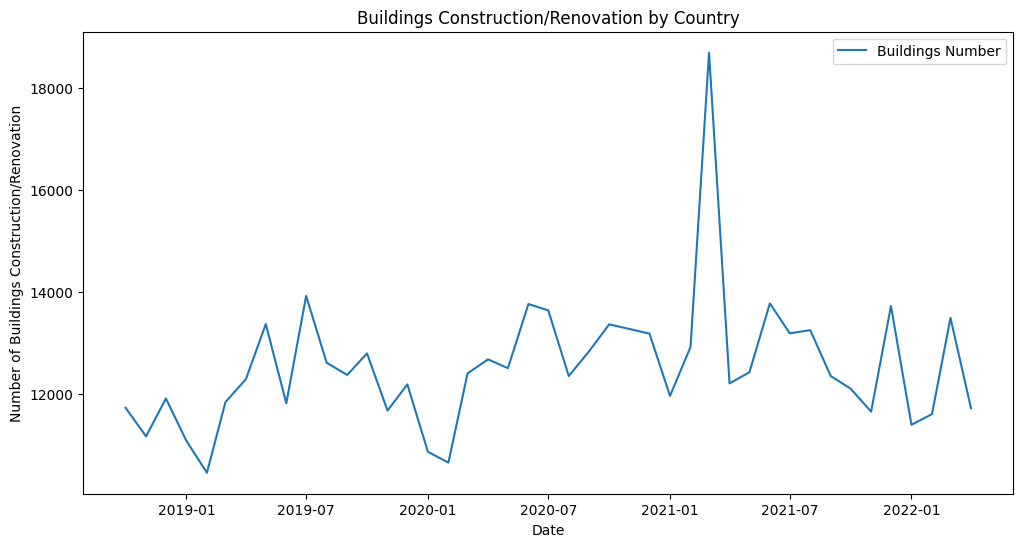

In [ ]:
f.multiple_line_plot(building, 'Number of Buildings Construction/Renovation', 'Buildings Construction/Renovation by Country')

In [ ]:
#building.to_csv("./extra data/buildings_data.csv")